# Use a diffusion equation solver to calculate poroelastic pressure diffusion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from heat import heat

Effective pressure diffusivity, log10(alpha_pure_ice)=-3.09
Effective pressure diffusivity, log10(alpha_salty_ice)=0.91


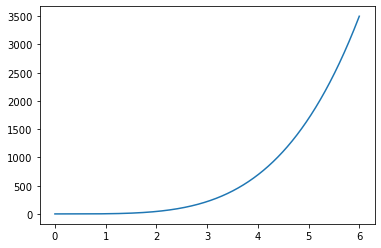

In [100]:
start_time = 0
end_time = 3600 * 6
number_of_time_steps = 1999
max_depth = 1

kappa = 1e-16 # https://www.cambridge.org/core/journals/journal-of-glaciology/article/permeameter-for-temperate-ice-first-results-on-permeability-sensitivity-to-grain-size/53264A85160DCA8FA798F07162D26AFC
kappa_salty = 1e-12 # We don't know this!
mustar = 1e-3 # Viscosity of water, Pa s
M = 910 * 4000**2 # P-wave modulus of ice
nu = 0.25
K = kappa / mustar * M
K_salty = kappa_salty / mustar*M
alpha_pure_ice = K / 3 * (1+nu)/(1-nu)
alpha_salty_ice = K_salty / 3 * (1+nu)/(1-nu)
print(f'Effective pressure diffusivity, log10(alpha_pure_ice)={np.log10(alpha_pure_ice):.2f}')
print(f'Effective pressure diffusivity, log10(alpha_salty_ice)={np.log10(alpha_salty_ice):.2f}')

t = np.linspace(start_time,end_time, number_of_time_steps+1)
p_max = 3500
p_interior= p_max*(t/end_time)**4
R = 0.064
h = 0.001
g = R/h * np.gradient(p_interior,t)

plt.plot(t/3600,p_interior)

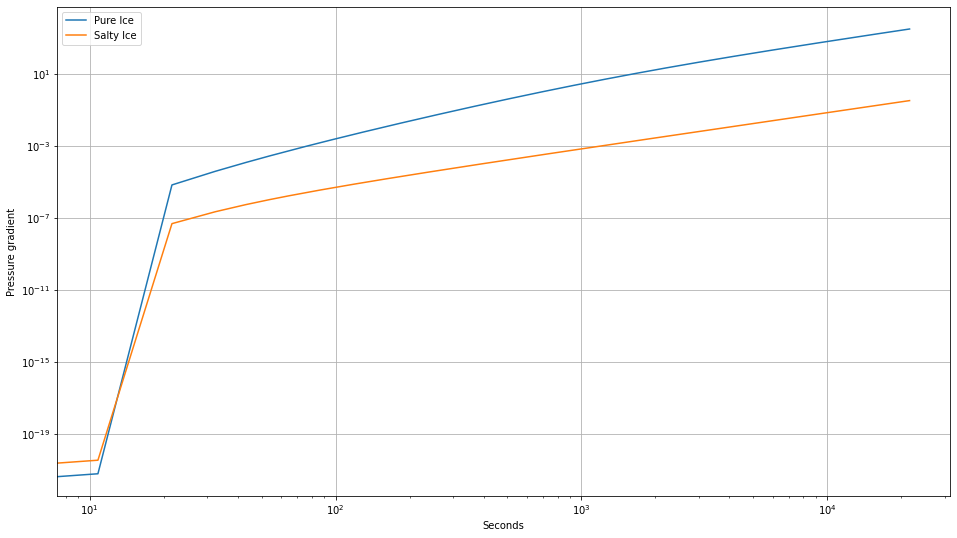

In [101]:
fig,ax=plt.subplots(figsize=(16,9))
for alpha,label in zip((alpha_pure_ice,alpha_salty_ice),("Pure Ice","Salty Ice")):
    U,t,z = heat(g,
             tmax=end_time,
             tmin=start_time,
             nt=number_of_time_steps,
             zmax=max_depth,
             alpha=alpha,
             dTdz=0 # "zero pressure" boundary condition
            )
    plt.plot(t, (U[0,:]-U[-1,:])/h ,label=label)

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Seconds')
plt.ylabel('Pressure gradient')
plt.grid()
plt.legend()